# Training on the Fashion MNIST dataset

## Importing required modules

In [1]:
from __future__ import absolute_import, division, print_function

# import TensforFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds

# Helper libs
import math
import numpy as np
import matplotlib.pyplot as plt

# Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

2.5.0


In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

## Loading the fashion MNIST dataset

In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

### Mapping class names

| Label | Class |
| ----- | ----- |
| 0     | T-shirt/top |
| 1     | Trouser |
| 2     | Pullover |
| 3     | Dress |
| 4     | Coat |
| 5     | Sandal |
| 6     | Shirt |
| 7     | Sneaker |
| 8     | Bag |
| 9     | Ankle boot |


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]

## Exploratory data analysis

In [5]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [6]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

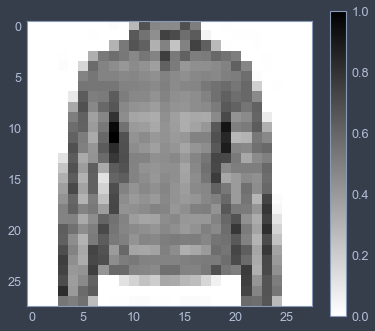

In [7]:
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28, 28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

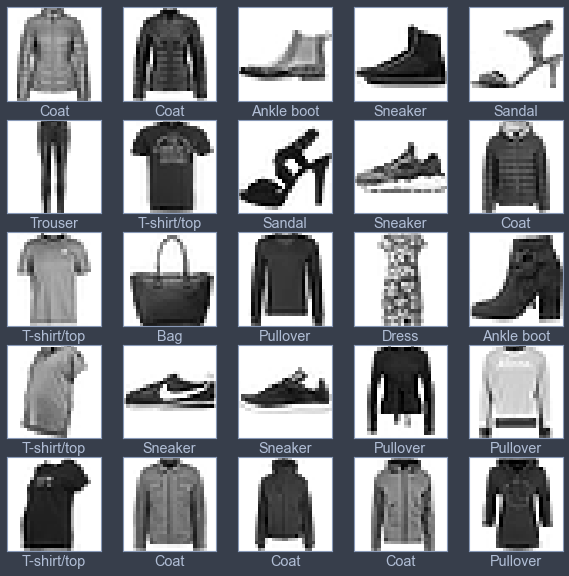

In [8]:
plt.figure(figsize=(10, 10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28, 28))
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1

plt.show()

## Building the model

The model consists of 1 input layer with flattened image data, 1 hidden layer with ReLU activation and 1 softmax output layer 

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [10]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

## Training the model

In [11]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [12]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 11s 4ms/step - loss: 0.4921 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3719 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3337 - accuracy: 0.8785
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3112 - accuracy: 0.8863
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2883 - accuracy: 0.8945


In [13]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3606 - accuracy: 0.8726
Accuracy on test dataset: 0.8726000189781189


# Make predictions

In [14]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [15]:
predictions.shape

(32, 10)

In [16]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[..., 0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'pink'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('pink')

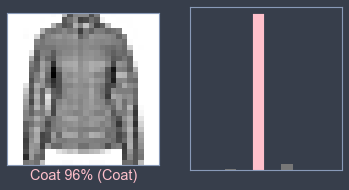

In [17]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

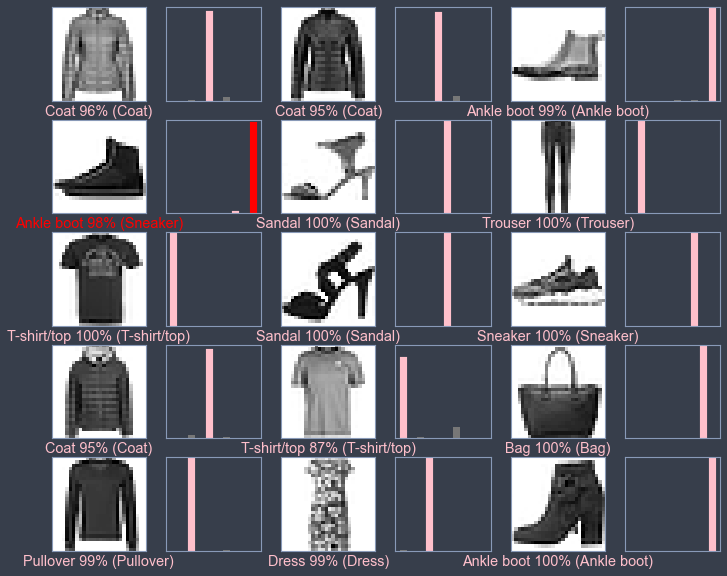

In [18]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [19]:
img = test_images[0]
img = np.array([img])

predictions_single = model.predict(img)
print(predictions_single)

[[8.6477494e-06 9.4196047e-08 5.8491817e-03 1.3625237e-06 9.5572501e-01
  1.9251620e-10 3.8415466e-02 4.6543602e-12 1.9791722e-07 5.0144400e-10]]


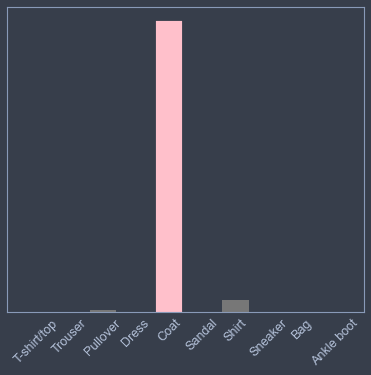

In [20]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)